In [100]:
# Import numpy and matplotlib
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from tqdm.notebook import trange, tqdm

# Fractional Brownian motion

We recall from the first lectures that one of the properties of the Wiener process is that

\begin{align}
\langle W_t - W_s \rangle &= 0, \\
\langle ( W_t - W_s)^2 \rangle &= |t - s|,
\end{align}

that is, the increments of the Wiener process over an interval $[s, t]$ have zero mean, and variance equal to the length of the interval, $t-s$.

Sometimes, however, we might wish to generate stochastic procesess whose increments still have zero mean, but with variance that grows either faster or slower with time. An example of such a class of processes is called fractional Brownian motion (recall that _Brownian motion_ is often used as a synonym for _Wiener process_).

Fractional Brownion motion is usually denoted $B_H$, where the parameter $H$ is called the Hurst exponent. The fractional Brownion motion has increments where

\begin{align}
\langle B_H(t) - B_H(s) \rangle &= 0, \\
\langle ( B_H(t) - B_H(s) )^2 \rangle &= |t - s|^{2H},
\end{align}

For $H=1/2$, the fractional Brownian motion is identical the normal Wiener process.

## Non-independent increments

For the Wiener process, we recall that the increments were independent Gaussian random numbers. For fractional Brownian motion, the increments are still Gaussian, but no longer independent. In particular:
* If $H > 1/2$, the fractional Brownian motion is more likely to keep going in the same direction for several steps in a row
* If $H < 1/2$, the fractional Brownian motion is more likely to change direction every step.

It can be shown analytically that the co-variance between two values at different times, $B_H(s)$ and $B_H(t)$, does not in fact go to zero for any finite time difference. This means that the next increment is dependent not just on the current value, but on _all_ previous values (though of course it depends more strongly on the recent values).

This type of behaviour, where the next values depend on at least the recent history, turns out to appear in many situations in nature. For some examples, see:
* Mandelbrot, B. B., & Wallis, J. R. (1969). Some long‐run properties of geophysical records. _Water resources research_, 5(2), 321-340. https://doi.org/10.1029/WR005i002p00321
* Mandelbrot, B. B., & Wallis, J. R. (1969). Computer experiments with fractional Gaussian noises: Part 1, averages and variances. _Water resources research_, 5(1), 228-241.  https://doi.org/10.1029/WR005i001p00228
* Feder, J., (1988). _Fractals_ Plenum Press, New York, London, ISBN 0306428512. https://link.springer.com/book/10.1007/978-1-4899-2124-6

## Numerical generation of fractional Brownian motion

Generating numerical realisations of fractional Brownian motion is somewhat more complicated than generating realisations of the Wiener process, and a range of methods exist. We will not go through how the methods work, but simply use an open source library to generate realisations. For a review of a few different methods, see for example pages 13-30 in this document: http://www.columbia.edu/~ad3217/fbm/thesisold.pdf

The library I will use is called stochastic (https://github.com/crflynn/stochastic), which is based on an older library called fbm (https://github.com/crflynn/fbm), that has some useful links and references, as well as fairly readable code.

In [101]:
from stochastic.processes.continuous import FractionalBrownianMotion

## Some example visualisations of fractional Brownian motion

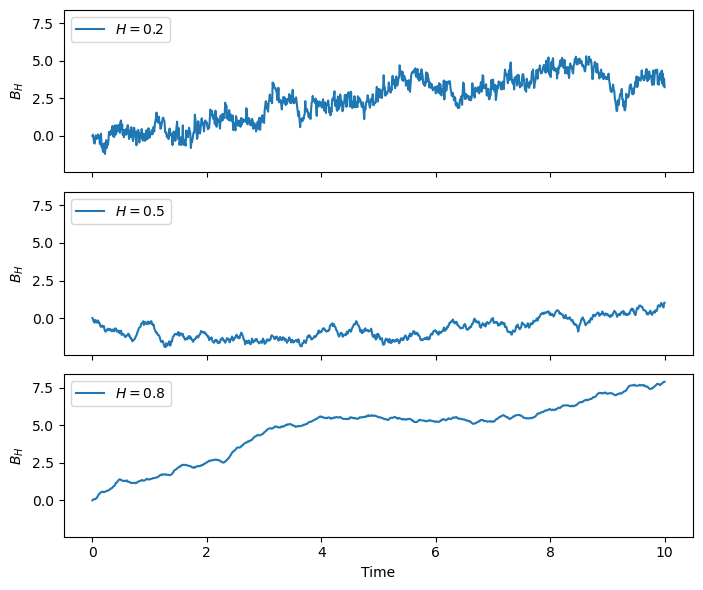

In [72]:
Tmax = 10
Nt = 1000

fig, ax = plt.subplots(nrows=3, figsize=(7,6), sharex=True, sharey=True)

for i, H in enumerate([0.2, 0.5, 0.8]):
    # Object from the stochastic library, to generate realisations
    # of fractional Brownian motion
    fBm = FractionalBrownianMotion(hurst=H, t=Tmax)
    
    ax[i].plot(fBm.times(Nt), fBm.sample(Nt), label=f'$H={H}$')
    ax[i].set_ylabel('$B_H$')
    ax[i].legend(loc='upper left')

ax[2].set_xlabel('Time')
plt.tight_layout()

## Mean-square displacement as a function of time

In [98]:
H = 0.2
Tmax = 1
Nt = 10000
Np = 200

# Object from the stochastic library, to generate realisations
# of fractional Brownian motion
fBm = FractionalBrownianMotion(hurst=H, t=Tmax)

# Array to hold many realisations
B_H = np.zeros((Nt+1, Np))
for i in range(Np):
    B_H[:,i] = fBm.sample(Nt)
    
t = fBm.times(Nt)

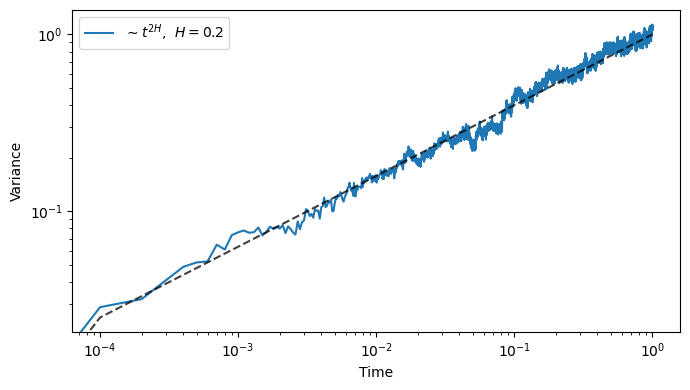

In [99]:
fig = plt.figure(figsize=(7,4))

plt.plot(t, np.var(B_H, axis=1), label=f'$\sim t^{{2H}}$,  $H={H}$')
plt.plot(t, t**(2*H), '--', c='k', alpha=0.75)

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('Variance')
plt.tight_layout()

## Autocorrelation of fractional Brownian motion and the Wiener process

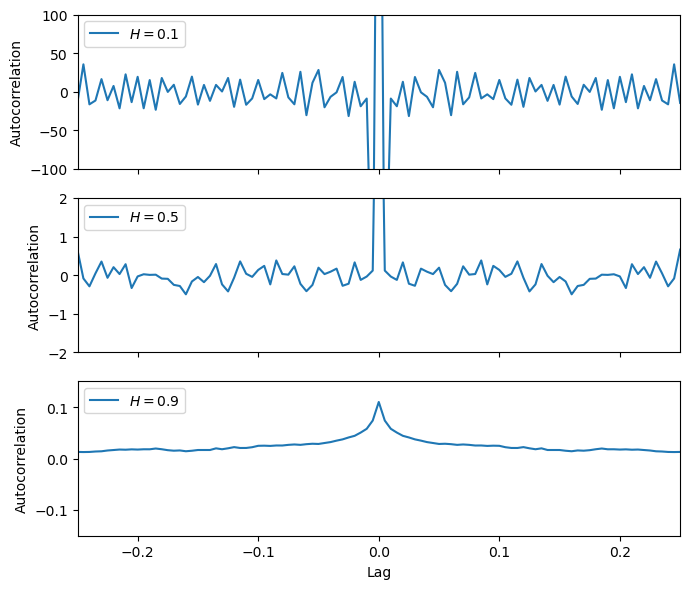

In [119]:
Tmax = 10
Nt = 2000

fig, ax = plt.subplots(nrows=3, figsize=(7,6), sharex=True)

for i, H in enumerate([0.1, 0.5, 0.9]):
    # Object from the stochastic library, to generate realisations
    # of fractional Brownian motion
    fBm = FractionalBrownianMotion(hurst=H, t=Tmax)
    
    B_H = fBm.sample(Nt)
    dB = B_H[1:] - B_H[:-1]
    c = np.correlate(dB, dB, mode='full')
    t = np.linspace(-Tmax, Tmax, len(c))
    ax[i].plot(t, c, label=f'$H={H}$')
    ax[i].set_ylabel('Autocorrelation')
    ax[i].legend(loc='upper left')

ax[2].set_xlabel('Lag')

ax[0].set_ylim(-100, 100)
ax[1].set_ylim(-2, 2)
ax[2].set_ylim(-0.15, 0.15)
ax[2].set_xlim(-0.25, 0.25)
plt.tight_layout()